In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.regularizers import l2
from matplotlib import pyplot
import plotly.graph_objects as go
import cv2
from tqdm import tqdm
import os 
import glob 
import tensorflow as tf
import keras
import random
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization

In [3]:
train_dogs = []
train_cats = []

# Load images and labels for each class
for f in glob.iglob("F:\\BFCAI\\ML\\Datasets\\Cats_Dogs\\train/dogs/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    train_dogs.append((img, 0))

for f in glob.iglob("F:\\BFCAI\\ML\\Datasets\\Cats_Dogs\\train/cats/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_cats.append((img, 1))

In [4]:
print(f"There are {len(train_dogs) } sample in Dogs Class")
print(f"There are {len(train_cats) } sample in Cats Class")

There are 278 sample in Dogs Class
There are 279 sample in Cats Class


In [12]:
def plot_random(dogs, cats, num=5):
    dogs = np.array(dogs, dtype=object)
    cats = np.array(cats, dtype=object)
    dogs = dogs[np.random.choice(len(dogs), num, replace=False)]
    cats = cats[np.random.choice(len(cats), num, replace=False)]
    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Dog')
        plt.imshow(dogs[i][0])  # Use [0] to access the image data
    
    plt.figure(figsize=(16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Cat')
        plt.imshow(cats[i][0])

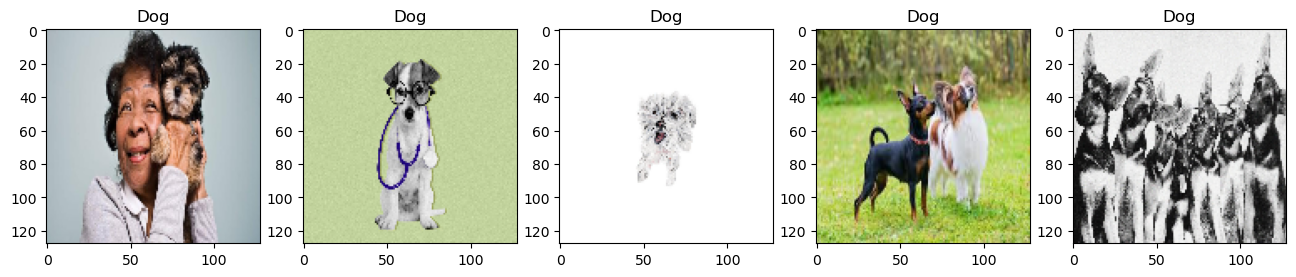

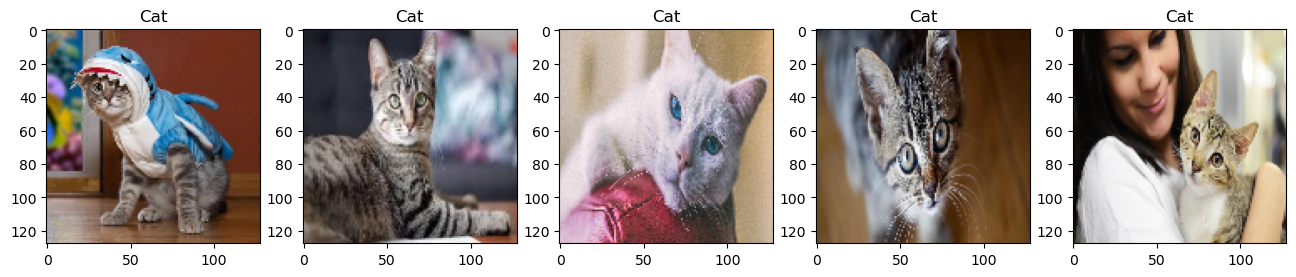

In [13]:
plot_random(train_dogs,train_cats)

In [14]:
def plot_class_distribution(classes, class_names):
    class_counts = [len(class_data) for class_data in classes]
    
    colors = ['blue', 'green', 'red', 'orange']
    
    fig = go.Figure()
    for i, class_name in enumerate(class_names):
        fig.add_trace(go.Bar(
            x=[class_name],
            y=[class_counts[i]],
            name=class_name,
            marker_color=colors[i]
        ))
    
    fig.update_layout(
        title=dict(
            text='Class Distribution in Training Data',
            x=0.5,  # Center the title
            xanchor='center'  # Anchor title to the center
        ),
        xaxis_title='Class',
        yaxis_title='Number of Samples',
        barmode='group'
    )
    
    fig.show()

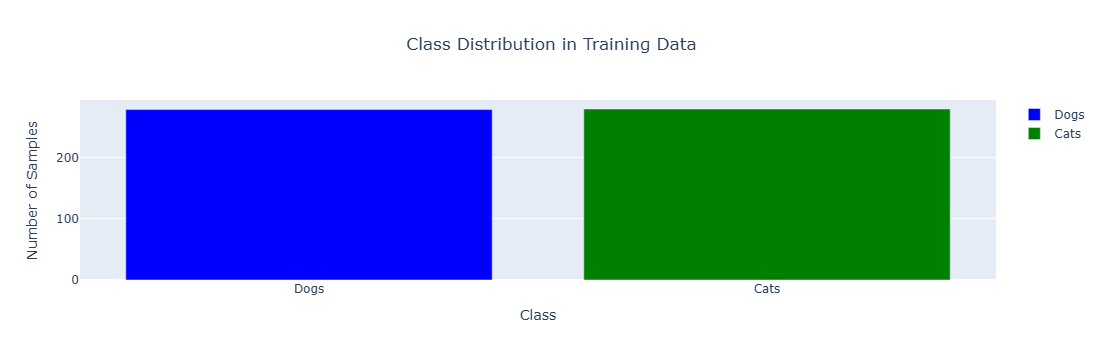

In [15]:
plot_class_distribution(
    [train_dogs, train_cats],
    ['Dogs', 'Cats']
)

In [20]:
test_dogs = []
test_cats = []

for f in glob.iglob("F:\\BFCAI\\ML\\Datasets\\Cats_Dogs\\test/dogs/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_dogs.append((img, 0))

for f in glob.iglob("F:\\BFCAI\\ML\\Datasets\\Cats_Dogs\\test/cats/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_cats.append((img, 1))

In [21]:
print(f"There are {len(test_dogs) } sample in Dogs Class")
print(f"There are {len(test_cats) } sample in Cats Class")

There are 70 sample in Dogs Class
There are 70 sample in Cats Class


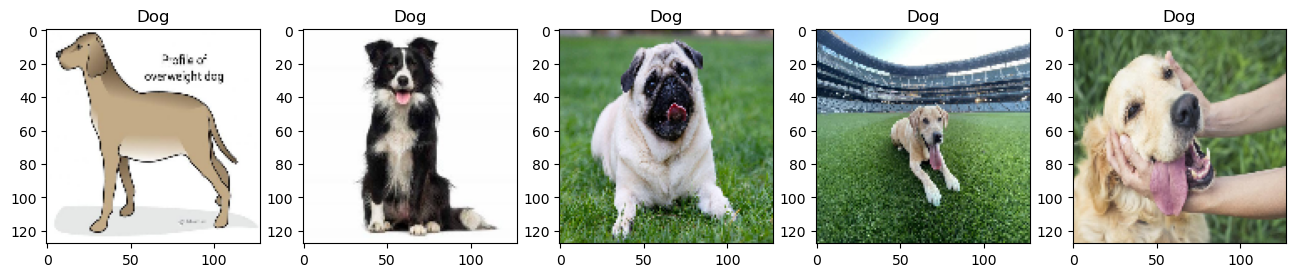

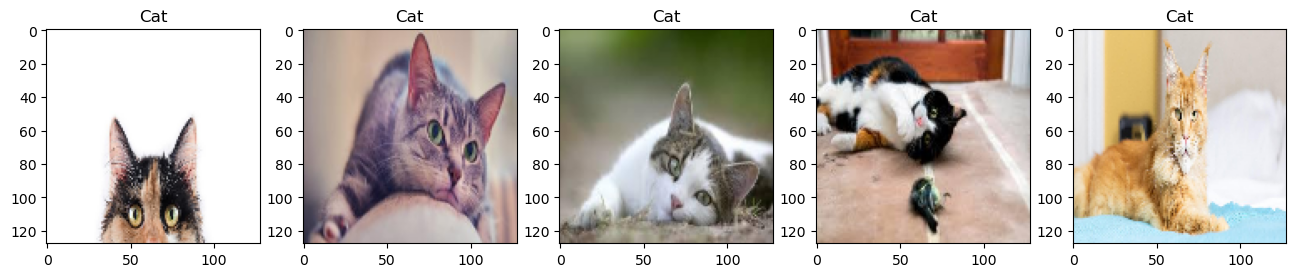

In [22]:
plot_random(test_dogs,test_cats)

In [23]:
def plot_class_distribution_pie(classes, class_names):
    class_counts = [len(class_data) for class_data in classes]
    
    colors = ['blue', 'green', 'red', 'orange']
    
    fig = go.Figure(data=[go.Pie(
        labels=class_names,
        values=class_counts,
        hole=0.3, 
        marker=dict(colors=colors)
    )])
    
    fig.update_layout(
        title=dict(
            text='Class Distribution in Test Data',
            x=0.5, 
            xanchor='center'  
        )
    )
    
    fig.show()

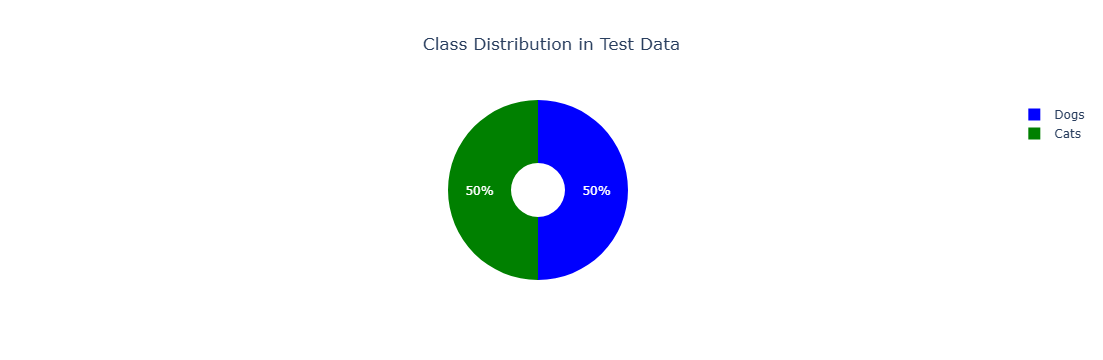

In [24]:
plot_class_distribution_pie(
    [test_dogs, test_cats],
    ['Dogs', 'Cats']
)

In [25]:
train_data = train_cats + train_dogs
test_data = test_cats + test_dogs

In [26]:
len(train_data),len(test_data)

(557, 140)

In [28]:
x_train = []
y_train = [] 
for feature , label in train_data:
    x_train.append(feature)
    y_train.append(label)
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train, 2)
x_train = x_train.astype('float32')
x_train =x_train /255.0

In [29]:
# Testing Data
x_test = []
y_test = [] 
for feature , label in test_data:
    x_test.append(feature)
    y_test.append(label)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test = to_categorical(y_test, 2)
x_test = x_test.astype('float32')
x_test =x_test /255.0

In [30]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size= 0.1, random_state= 42)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(501, 128, 128, 3)
(501, 2)
(56, 128, 128, 3)
(56, 2)


### Model 1

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(2, activation='sigmoid'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [35]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5155 - loss: 30.6309 - val_accuracy: 0.6071 - val_loss: 4.0991
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5051 - loss: 3.3781 - val_accuracy: 0.6071 - val_loss: 0.8264
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5565 - loss: 0.7545 - val_accuracy: 0.4821 - val_loss: 0.7581
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7874 - loss: 0.5000 - val_accuracy: 0.4821 - val_loss: 0.8882
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9166 - loss: 0.3612 - val_accuracy: 0.6429 - val_loss: 0.6838
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9272 - loss: 0.2258 - val_accuracy: 0.4821 - val_loss: 0.9188
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9802 - loss: 0.1144 - val_accuracy: 0.5536 - val_loss: 1.0253
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9975 - loss: 0.0503 - val_accuracy: 0.5179 - val_loss: 1.2660
Epoch 9

In [36]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 0.5954 - loss: 1.1376
Test accuracy: 0.6143


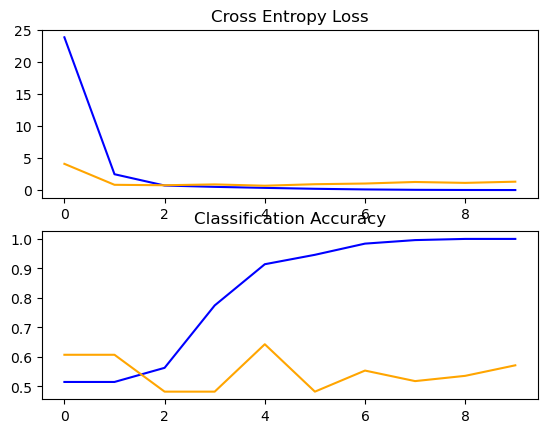

In [37]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

### Model 2

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.6363 - loss: 0.8149 - val_accuracy: 0.6071 - val_loss: 0.6938
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.6974 - loss: 0.6736 - val_accuracy: 0.6607 - val_loss: 0.6332
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7308 - loss: 0.6159 - val_accuracy: 0.4464 - val_loss: 0.7942
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7237 - loss: 0.5982 - val_accuracy: 0.6071 - val_loss: 0.6855
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7873 - loss: 0.4948 - val_accuracy: 0.6607 - val_loss: 0.6755
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7855 - loss: 0.5241 - val_accuracy: 0.5893 - val_loss: 0.6668
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.8696 - loss: 0.2913 - val_accuracy: 0.6071 - val_loss: 0.6811
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.8519 - loss: 0.3366 - val_accuracy: 0.4821 - val_loss: 0.7735
Epoch 9/

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

In [ ]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')